In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from pathlib import Path
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load CSV file into the df
crypto_df = pd.read_csv('/kaggle/input/crypto-data/crypto_data.csv')
crypto_df.head()
crypto_df.info()

#picking crypto that is currently being traded
trading_crypto= crypto_df[crypto_df['IsTrading'] == True]

#droping the 'istrading column'
trading_crypto = trading_crypto.drop(columns ='IsTrading')

#Checking for any null values inn df
trading_crypto.isnull().values.any()

# Check number of null values in df
trading_crypto.isnull().values.sum()

#checking number of null values are the column they are located in
trading_crypto.isnull().sum()

# Filter for cryptocurrencies that have been mined greater than zero
trading_crypto_g0 = trading_crypto[trading_crypto["TotalCoinsMined"]> 0]

#Since the coin names do not contribute to the analysis of the data, deleting CoinName
trading_crypto_g0.drop(columns='CoinName', axis=1, inplace= True)


# Drop Unamed:0 columns
trading_crypto_g0 = trading_crypto_g0.drop(columns=['Unnamed: 0'])

#Convert features with text values, `Algorithm` and `ProofType`, into numerical data
X = pd.get_dummies(trading_crypto_g0, columns=['Algorithm', 'ProofType'])

#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [3]:
#Performing dimensionality reduction with PCA using `PCA(n_components=0.99)` 
#to reducing the dataset to 80 principal components or 3
pca = PCA(n_components=0.90)
X_scaled_pca = pca.fit_transform(X_scaled)
# Fetch explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

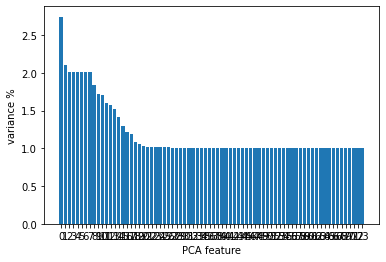

0.9010870638268429

In [4]:
from sklearn.pipeline import make_pipeline

pipeline=make_pipeline(scaler,pca)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

#We brought down the number of features to 74 from 98
#X_scaled_pca.shape

pca.explained_variance_ratio_.sum()

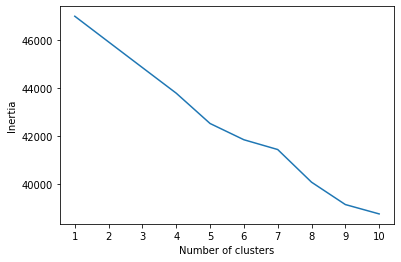

In [5]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_scaled_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
#Can not seem to separate clusters so need to tuning the algorithm.
# Initializing model with K = 5 (since that is where there is a slight elbow in the graph)
model = KMeans(n_clusters=5, random_state=5)
# Fitting model
model.fit(X_scaled_pca)

#Seems KMeans can see five clusters. 


KMeans(n_clusters=5, random_state=5)

In [7]:
# Now using t-SNE model to reduce the dimension
#number between 10 and 1000, you will get different results
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(X_scaled_pca)

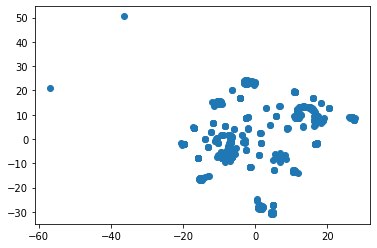

In [8]:
# Plot the dataset
# The first column of transformed features
New_df= pd.DataFrame()

New_df['x'] = tsne_features[:,0]

# The second column of transformed features
New_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(New_df['x'], New_df['y'])
plt.show()


Dose not seem the t-SNE did a good job at separate the clusters. 